# Chpater 3 Neural Network 

퍼셉트론은 복잡한 함수도 표현이 가능하지만 가중치를 설정하는 작업은 여전히 사람이 수동으로 한다는 것입니다. Chapter 2에서 AND. OR, NAND GATE로 표현한 것 처럼 적절한 가중치를 사람이 직접 정했습니다. 하지만 신경망은 가중치 매개변수의 적절한 값을 데이터로부토 자동으로 학습하는 능력이 있습니다. 

## 3.1 From Perceptron to Neural Netowrk

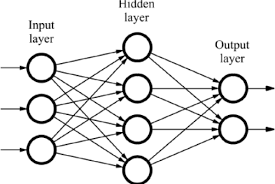

가장 왼쪽 줄이 입력층, 맨 오른쪽 줄은 출력층, 중간 줄은 은닉층이라고 합니다. 은닉층의 뉴런은 사람눈에는 보이지 않습니다. 

그 전 Chapter에서 봤던 Perceptron을 예를 들어 신경망에 대해 설명하겠습니다. 

$$y=\begin{equation}
\left\{ 
  \begin{aligned}
    0(b + w_1x_1&+w_1x_2 <= 0)\\
    1(b + w_1x_1&+w_1x_2 > 0)\\
  \end{aligned}
  \right.
\end{equation}
$$

여기서 b는 편향이며 뉴런이 얼마나 쉽게 활성화하는지를 젱합니다. w1과 w2는 각 신호의 가중치를 나타내는 매개변수로, 각 신호의 영향력을 제어합니다. Bias를 네트워크 명시를 하면 아래와 같은 네트워크를 그릴 수 있습니다. 밑에 그림에서는 가중치가 b이고 입력이 1인 뉴런이 추가되었습니다. 이 퍼셉트론 동작은 x1, x2, 1이라는 3개의 신호가 입력되어, 각 신호의 가중치와 곱한 후 다음 뉴런에 전달이 됩니다. 

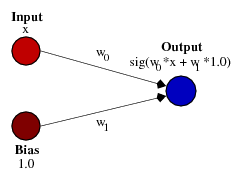

위에 그림을 수식으로 조금 더 간단히 표현을 하면 

\begin{gather*}
y = h(b + w_1x_1 + w_2x_2)
\end{gather*}

$$h(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    0 (x <= 0)\\
    1 (x > 0)\\
  \end{aligned}
  \right.
\end{equation}
$$

입력 신호의 합은 h(x)라는 함수를 거쳐 변환되어, 변환된 값이 y의 출력이 됩을 보여줍니다. 이러한 함수를 활성화 함수 (activation function)이라 합니다. 활성화 함수는 input signal의 총합이 활성화를 일으키는지를 정하는 역할을 합니다. 

Process of Activation Function 

\begin{gather*}
a = h(b + w_1x_1 + w_2x_2)\\
y = h(a)
\end{gather*}

그러므로 활성화 함수의 뉴런은 총합을 계산하여 y로 나타내는 두 단계를 그립니다. 

## 3.2 Activation Function

위에 식처럼 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단함수라고 합니다. 그래서 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다라 할 수 있다. 위에 예제는 활성화 함수로 쓸 수 있는 여러 함수 중 퍼셉트론은 계단 함수를 활용하고 있습니다. 

Sigmoid Function

신경망에서 자주 이용하는 함수인 sigmoid function을 나타낸 식입니다. 

$$
  h(x) = \frac{1}{1 + e^x-1}\ 
$$

In [1]:
## step function 구현 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
def step_function(x):
    if x > 0: 
        return 1 
    else: 
        return 0
    
## or 

def step_function(x):
    y = x > 0 
    ## converting int value to return boolean by int 
    return y.astype(np.int)

In [2]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0 
print(y)
y = y.astype(np.int)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]
[-1.  1.  2.]
[False  True  True]
[0 1 1]


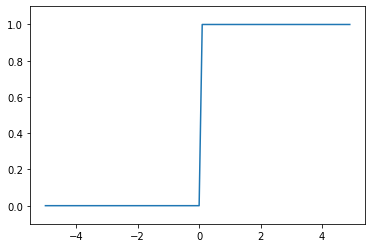

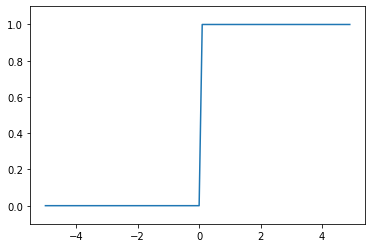

In [3]:
## plotting step function 
import matplotlib.pylab as plt 

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

위 계단 함수의 그래프에서 보엿듯이 0을 경계로 출력이 0에서 1 또는 반대로 바뀝니다. 이러한 모양으로 계단 함수라고 불립니다. 

In [4]:
## sigmoid 함수 구현 
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

array([0.26894142, 0.73105858, 0.88079708])

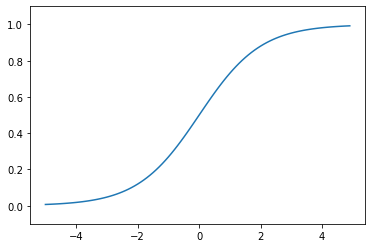

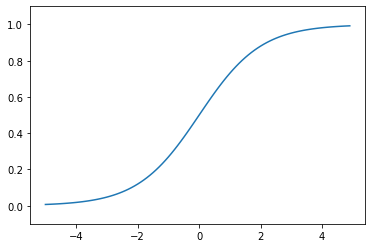

In [5]:
## drawing sigmoid function graph 
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

계단함수는 discrete 하지만 시그모이드 함수는 연속적입니다. 신경망에서는 활성화 함수로 비선형 함수를 사용해야 합니다. 왜냐하면 비선형은 신경망의 층을 깊게 하는 의미가 없어지기 때문입니다. 선형 함수의 문제는 층을 깊게 해도 은닉층이 없는 네트워크로도 똑같이 기능을 구축할 수 있습니다, 

RELU (Rectified Lienar Unit)

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수입니다. 

$$h(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    0 (x <= 0)\\
    1 (x > 0)\\
  \end{aligned}
  \right.
\end{equation}
$$



In [6]:
## ReLu 함수 구현 
def relu(x): 
    return np.maximum(0, x)

In [7]:
## 다차원 배열의 계산 
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[1 2 3 4]
1
(4,)
4
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
[1 2 3 4]
1
(4,)
4
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [8]:
## 행렬의 곱 
## 행렬의 곱에서는 대응하는 차원의 원소 수를 일치시켜라 
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
print(np.dot(A, B))
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
np.dot(A, B)

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


array([[22, 28],
       [49, 64]])

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


array([[22, 28],
       [49, 64]])

In [9]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

array([[22, 28],
       [49, 64]])

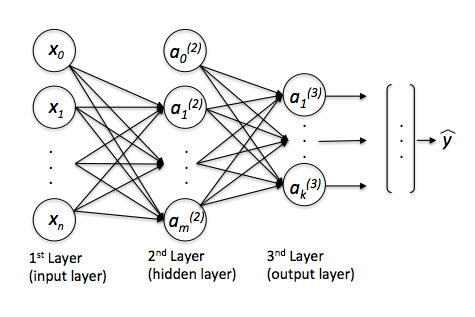

위에 이미지처럼 다차원의 노드를 곱하면서 y값을 도출 할 수 있습니다

In [10]:
## 3 층 신경망 구현 

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network ['W2'] = np.array([[0.1, 0.4], [0.2, 0.5,], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def identity_function(x):
    return x 

def forward(network, x): 
    W1, W2, W3 = network['W1'], network['W2'] , network['W3']
    b1, b2, b3 = network['b1'], network['b2'] , network['b3']
    
    a1 = np.dot(x, W1) + b1 
    z1 = sigmoid(a1)
    a2 =  np.dot(z1, W2) + b2 
    z2 = sigmoid(a2)
    a3 =  np.dot(z2, W3) + b3 
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)
    

[0.31682708 0.69627909]
[0.31682708 0.69627909]


함수 이름이 forward인 것은 신호가 순방향으로 전달됨을 알리기 위함입니다. 

출력층 설계하기 
- 신경망은 분류와 회귀 모두에 이용할 수 있습니다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라집니다.
- 일반적으로 회귀에는 항등 함수를, 분류에는 소프트 맥스 함수를 사용합니다. 

항등 함수 (identity function)
- 입력을 그대로 출력합니다.
- 입력과 출력이 항상 같다는 뜻의 항등입니다 

소프트맥스 함수(softmax function)

공식 

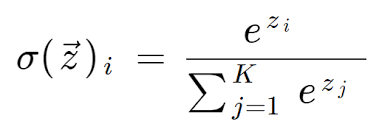

K는 출령층의 뉴런 수, i는 그중 i번째 출력임을 뜻합니다

In [11]:
## softmax function 구현 
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 지수 함수 
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [12]:
def softmax(a):
    exp_a = np.exp(a) # 지수 함수 
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y 
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

array([0.01821127, 0.24519181, 0.73659691])

컴퓨터로 softmax를 구현하였을 때 오버플로 문제가 있습니다. 소프트맥스 함수는 지수 함수를  사용하는데, 대게 지수함수는 큰 값을 보여줍니다. 
그러므로 이런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해집니다. 

또한 위에 공식에서 보이는 것처럼 임의의 정수를 빼거나 더해도 결과값은 변하지 않습니다. 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적입니다. 

In [13]:
a = np.array([1010, 1000, 990])
print(np.exp(a)/np.sum(np.exp(a)))
c = np.max(a)
print(c)
print(a - c)
np.exp(a-c) / np.sum(np.exp(a-c))

[nan nan nan]
1010
[  0 -10 -20]
[nan nan nan]
1010
[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

위에 예제처럼 값이 크면 nan이라고 표시됩니다. 

In [14]:
def softmax(a): 
    c = np.max(a)
    return np.exp(a-c) / np.sum(np.exp(a-c))

softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

소프트맥스 함수의 출력은 0에서 1사이의 실수입니다. 또 소프트맥스 함수의 출력의 총합은 1입니다. 출력 총합이 1인것은 확률로 해석할 수 있습니다.추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반 적인게 지수 함수여서 각 원소의 대소 관계는 변하지 않습니다.

출력층의 뉴런 수 정하기 
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적입니다. 


In [15]:
## mnist 손글짜 숫자 인식 
import sys, os 
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
#(훈련 이미지, 레이블) (테스트 이미지, 테스트 레이블)
#normalize scales values from zero to one 
#flatten makes one -Dimensional image 
#one hot hand encoding turns a label into (1 x number of classification classes)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
import sys, os 
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np 
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28) ## transforming into original image 
print(img.shape)
img_show(img)

5
(784,)
(28, 28)
5
(784,)
(28, 28)


In [19]:
import pickle
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    ## loading pickle file in dataset 
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network 

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'] , network['W3']
    b1, b2, b3 = network['b1'], network['b2'] , network['b3']
    a1 = np.dot(x, W1) + b1 
    z1 = sigmoid(a1)
    a2 =  np.dot(z1, W2) + b2 
    z2 = sigmoid(a2)
    a3 =  np.dot(z2, W3) + b3 
    y = softmax(a3)
    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0 
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1 

print("Accuracy: " + str(accuracy_cnt / len(x)))

Accuracy: 0.9352
Accuracy: 0.9352


배치 처리 
딥러닝에서 배치는 모델의 가중치를 한번 업데이트시킬 때 사용되는 샘플들의 묶음을 의미합니다. 만약에 총 1000개의 훈련 샘플이 있는데, 배치 사이즈가 20이라면 20개의 샘플 단위마다 모델의 가중치를 한번씩 업데이트시킵니다. 그러니까 총 50번(=1000/20) 가중치가 업데이트되겠죠. 하나의 데이터셋을 총 50개의 배치로 나눠서 훈련을 진행했다고 보면 됩니다. 

데이터를 읽는 횟수가 줄어 cpu/gpu computation 속도 향상에 도움을 줍니다


In [25]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0 
batch_size = 100
for i in range(0,len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt +=  np.sum(p == t[i:i+batch_size])
print("Accuracy: " + str(accuracy_cnt / len(x)))

Accuracy: 0.9352
Accuracy: 0.9352


정리
- 신경망에서는 활성화 함수 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다
- numpy 다차원 배열을 활용하여 신경만을 효율적으로 구현이 가능하다
- Machine Learning은 회귀와 분류로 나눌 수 있다 
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를 분류에서는 주로 소프트맥스 함수를 이용하낟 
- 분류엣는 출력층의 뉴런수를 분류하려는 클래스 수와 같게 설정한다 
- 입력 데이터를 묶은 것을 배치라 하여, 추론 처리를 이 배치 단위로 진행하면 빠른게 결과를 얻을 수 있다 